In [ ]:
## What is the effect of increasing state temperatures on wildfire severity and frequency?

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from datetime import datetime

In [2]:
# Import data
jan_avg_pcp = pd.read_csv('Resources/1990-2020_Jan_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
feb_avg_pcp = pd.read_csv('Resources/1990-2020_Feb_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
mar_avg_pcp = pd.read_csv('Resources/1990-2020_Mar_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
apr_avg_pcp = pd.read_csv('Resources/1990-2020_Apr_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
may_avg_pcp = pd.read_csv('Resources/1990-2020_May_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
jun_avg_pcp = pd.read_csv('Resources/1990-2020_Jun_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
jul_avg_pcp = pd.read_csv('Resources/1990-2020_Jul_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
aug_avg_pcp = pd.read_csv('Resources/1990-2020_Aug_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
sep_avg_pcp = pd.read_csv('Resources/1990-2020_Sep_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
oct_avg_pcp = pd.read_csv('Resources/1990-2020_Oct_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
nov_avg_pcp = pd.read_csv('Resources/1990-2020_Nov_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
dec_avg_pcp = pd.read_csv('Resources/1990-2020_Dec_AvgPcp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')

In [3]:
# Remove anomaly column 

# List of dataframes
months_dfs = [jan_avg_pcp, feb_avg_pcp, mar_avg_pcp, apr_avg_pcp, may_avg_pcp, jun_avg_pcp, jul_avg_pcp, aug_avg_pcp, sep_avg_pcp, oct_avg_pcp, nov_avg_pcp, dec_avg_pcp]

# Create a for loop to change last column to "NA" for all dfs and then drop column "NA" 
for df in months_dfs:
    df.columns = ['Date', 'Precip', 'NA']
    df['Precip (in)'] = df['Precip']
    df.drop('Precip', 1, inplace= True)
    del df['NA']

In [4]:
jul_avg_pcp.head()

,Date,Precip (in)
0,199007,0.28
1,199107,0.26
2,199207,0.24
3,199307,0.03
4,199407,0.05


In [5]:
# Create a loop to get year and month from all dataframes 
months_dfs = [jan_avg_pcp, feb_avg_pcp, mar_avg_pcp, apr_avg_pcp, may_avg_pcp, jun_avg_pcp, jul_avg_pcp, aug_avg_pcp, sep_avg_pcp, oct_avg_pcp, nov_avg_pcp, dec_avg_pcp]

for df in months_dfs:
    df['fake_year'] = pd.to_datetime(df['Date'],format='%Y%m')
    df['Year'] = pd.DatetimeIndex(df['fake_year']).year
    df['Month'] = pd.DatetimeIndex(df['fake_year']).month
    df.drop('fake_year', 1, inplace= True)
    df.drop('Date', 1, inplace= True)

In [6]:
# Set year as index
for df in months_dfs:
    df.set_index('Year', 1, inplace = True)

In [7]:
# Merge data from Jan-Dec on Month (or year), how = left
t1 = pd.merge(jan_avg_pcp, feb_avg_pcp, on= 'Year', how= 'left', suffixes=('_Jan', '_Feb'))
t2 = pd.merge(t1, mar_avg_pcp,  on= 'Year', how= 'left', suffixes=("",""))
t3 = pd.merge(t2, apr_avg_pcp,  on= 'Year', how= 'left', suffixes=('_Mar', '_Apr'))
t4 = pd.merge(t3, may_avg_pcp,  on= 'Year', how= 'left', suffixes=("",""))
t5 = pd.merge(t4, jun_avg_pcp,  on= 'Year', how= 'left', suffixes=('_May', '_Jun'))
t5.drop(['Month_Jan', 'Month_Feb', 'Month_Mar', 'Month_Apr', 'Month_May', 'Month_Jun'], 1, inplace = True)
t6 = pd.merge(t5, jul_avg_pcp,  on= 'Year', how= 'left', suffixes=("",""))
t7 = pd.merge(t6, aug_avg_pcp,  on= 'Year', how= 'left', suffixes=('_Jul', '_Aug'))
t8 = pd.merge(t7, sep_avg_pcp,  on= 'Year', how= 'left', suffixes=("",""))
t9 = pd.merge(t8, oct_avg_pcp,  on= 'Year', how= 'left', suffixes=('_Sep', '_Oct'))
t10 = pd.merge(t9, nov_avg_pcp,  on= 'Year', how= 'left', suffixes=("",""))
merged_df = pd.merge(t10, dec_avg_pcp,  on= 'Year', how= 'left', suffixes=('_Nov', '_Dec')) 
merged_df.drop(['Month_Jul', 'Month_Aug', 'Month_Sep', 'Month_Oct', 'Month_Nov', 'Month_Dec'], 1, inplace = True)

In [8]:
merged_df['yearly mean'] = merged_df.mean(axis=1)

In [9]:
merged_df.head()

,Precip (in)_Jan,Precip (in)_Feb,Precip (in)_Mar,Precip (in)_Apr,Precip (in)_May,Precip (in)_Jun,Precip (in)_Jul,Precip (in)_Aug,Precip (in)_Sep,Precip (in)_Oct,Precip (in)_Nov,Precip (in)_Dec,yearly mean
Year,,,,,,,,,,,,,
1990,3.72,2.36,1.30,0.83,2.46,0.18,0.28,0.36,0.41,0.47,0.71,0.91,1.165833
1991,1.00,2.24,9.11,0.75,0.82,0.32,0.26,0.20,0.24,1.28,1.07,2.50,1.649167
1992,1.94,5.98,3.65,1.03,0.23,0.71,0.24,0.20,0.05,2.13,0.59,6.48,1.935833
1993,8.86,5.98,3.05,1.45,1.44,0.87,0.03,0.22,0.04,0.82,1.42,2.52,2.225000
1994,1.91,3.96,1.24,1.36,1.35,0.10,0.05,0.06,0.34,0.63,3.73,2.81,1.461667


In [10]:
# Reset index
new_df = merged_df.reset_index()
new_df.head()

,Year,Precip (in)_Jan,Precip (in)_Feb,Precip (in)_Mar,Precip (in)_Apr,Precip (in)_May,Precip (in)_Jun,Precip (in)_Jul,Precip (in)_Aug,Precip (in)_Sep,Precip (in)_Oct,Precip (in)_Nov,Precip (in)_Dec,yearly mean
0,1990,3.72,2.36,1.30,0.83,2.46,0.18,0.28,0.36,0.41,0.47,0.71,0.91,1.165833
1,1991,1.00,2.24,9.11,0.75,0.82,0.32,0.26,0.20,0.24,1.28,1.07,2.50,1.649167
2,1992,1.94,5.98,3.65,1.03,0.23,0.71,0.24,0.20,0.05,2.13,0.59,6.48,1.935833
3,1993,8.86,5.98,3.05,1.45,1.44,0.87,0.03,0.22,0.04,0.82,1.42,2.52,2.225000
4,1994,1.91,3.96,1.24,1.36,1.35,0.10,0.05,0.06,0.34,0.63,3.73,2.81,1.461667


In [11]:
# Check cols
for cols in new_df.columns:
    print(cols)

Year
Precip (in)_Jan
Precip (in)_Feb
Precip (in)_Mar
Precip (in)_Apr
Precip (in)_May
Precip (in)_Jun
Precip (in)_Jul
Precip (in)_Aug
Precip (in)_Sep
Precip (in)_Oct
Precip (in)_Nov
Precip (in)_Dec
yearly mean


The correlation between year and the yearly average precipitation is -0.2


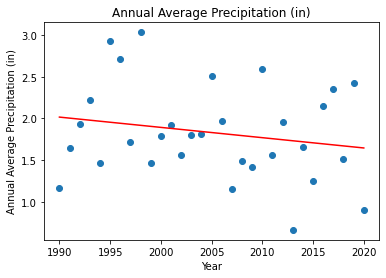

In [12]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(new_df['Year'],new_df['yearly mean'])[0],2)

# # Regression
slope, intercept, r, p, std_err = st.linregress(new_df['Year'],new_df['yearly mean'])

# # Calculate regression equation 
y = slope * new_df['Year'] + intercept

# # Plot the scatter
plt.scatter(new_df['Year'],new_df['yearly mean'])
plt.xlabel("Year")
plt.ylabel("Annual Average Precipitation (in)") 
plt.title("Annual Average Precipitation (in)")

# # Add regression line
plt.plot(new_df['Year'], y, "r-")
print(f'The correlation between year and the yearly average precipitation is {corr_coef}')

The correlation between year and the yearly average precipitation is -0.2


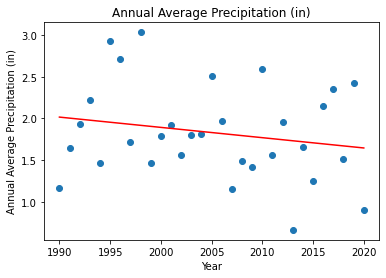

In [29]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(new_df['Year'],new_df['yearly mean'])[0],2)

# # Regression
slope, intercept, r, p, std_err = st.linregress(new_df['Year'],new_df['yearly mean'])

# # Calculate regression equation 
y = slope * new_df['Year'] + intercept

# # Plot the scatter
plt.scatter(new_df['Year'],new_df['yearly mean'])
plt.xlabel("Year")
plt.ylabel("Annual Average Precipitation (in)") 
plt.title("Annual Average Precipitation (in)")

# # Add regression line
plt.plot(new_df['Year'], y, "r-")
print(f'The correlation between year and the yearly average precipitation is {corr_coef}')